In [1]:
import numpy as np
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with actual credentials
connection = mysql.connector.connect(
 user='root',
 password='root',
 host='localhost',
 database='ecommerce'
)

In [3]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()

In [4]:
# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

In [5]:
# Query data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

In [6]:
# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

In [7]:
cursor.execute("""SELECT c.customer_id, c.name AS customer_name, c.city, c.email, c.phone_no, c.address, c.pin_code,
    o.order_id, o.product_id, o.quantity, o.total_price, o.payment_mode, o.order_date, o.order_status,
    p.product_name, p.category, p.sub_category, p.original_price, p.selling_price FROM customer c
    LEFT JOIN order_details o ON c.customer_id = o.customer_id
    LEFT JOIN product p ON o.product_id = p.product_id """)
coustmer_order_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [8]:
# Close the MySQL connection
cursor.close()
connection.close()

In [9]:
#printing first 5 records from each table
customer_data.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171
3,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429
4,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830


In [10]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  62 non-null     object
 1   name         62 non-null     object
 2   city         62 non-null     object
 3   email        62 non-null     object
 4   phone_no     62 non-null     object
 5   address      62 non-null     object
 6   pin_code     62 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.5+ KB


In [11]:
customer_data.describe(include=object)

,customer_id,name,city,email,phone_no,address
count,62,62,62,62,62,62
unique,62,39,4,52,26,57
top,C1001,Ava,Tokyo,henry@gmail.com,1234567890,oo.pp.road
freq,1,4,22,3,11,2


In [12]:
customer_data.duplicated().value_counts()

False    62
Name: count, dtype: int64

In [13]:
product_data.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [14]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      61 non-null     object 
 1   product_name    61 non-null     object 
 2   category        61 non-null     object 
 3   sub_category    61 non-null     object 
 4   original_price  61 non-null     float64
 5   selling_price   61 non-null     float64
 6   stock           61 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.5+ KB


In [15]:
product_data.describe(include=object)

,product_id,product_name,category,sub_category
count,61,61,61,61
unique,61,43,4,22
top,P102,Tablet,Electronics,Electronics
freq,1,4,32,20


In [16]:
product_data['category'] = product_data['category'].replace('furniture','Furniture')

In [17]:
product_data.duplicated().value_counts()

False    61
Name: count, dtype: int64

In [18]:
order_data.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,delivered


In [19]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      76 non-null     int64         
 1   customer_id   76 non-null     object        
 2   product_id    76 non-null     object        
 3   quantity      76 non-null     float64       
 4   total_price   76 non-null     float64       
 5   payment_mode  76 non-null     object        
 6   order_date    76 non-null     datetime64[ns]
 7   order_status  76 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.9+ KB


In [20]:
order_data.duplicated().value_counts()

False    76
Name: count, dtype: int64

In [21]:
order_data['quantity'].value_counts()

quantity
1.0    52
2.0    21
3.0     3
Name: count, dtype: int64

In [22]:
coustmer_order_df.head()

,customer_id,customer_name,city,email,phone_no,address,pin_code,order_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,original_price,selling_price
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99,NaN,None,NaN,NaN,None,NaT,None,None,None,None,NaN,NaN
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001,NaN,None,NaN,NaN,None,NaT,None,None,None,None,NaN,NaN
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,10.0,P105,1.0,450.0,COD,2023-12-19,Pending,Blender,Appliance,Electronics,500.0,450.0
3,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,11.0,P103,1.0,55000.0,COD,2023-12-21,Pending,Laptop,Electronics,computer,60000.0,55000.0
4,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429,3.0,P112,1.0,1000.0,COD,2023-11-30,Pending,chair,Furniture,chairs,1000.0,800.0


In [23]:
coustmer_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     79 non-null     object        
 1   customer_name   79 non-null     object        
 2   city            79 non-null     object        
 3   email           79 non-null     object        
 4   phone_no        79 non-null     object        
 5   address         79 non-null     object        
 6   pin_code        79 non-null     int64         
 7   order_id        76 non-null     float64       
 8   product_id      76 non-null     object        
 9   quantity        76 non-null     float64       
 10  total_price     76 non-null     float64       
 11  payment_mode    76 non-null     object        
 12  order_date      76 non-null     datetime64[ns]
 13  order_status    76 non-null     object        
 14  product_name    76 non-null     object        
 15  category

In [24]:
coustmer_order_df.duplicated().value_counts()

False    79
Name: count, dtype: int64

In [25]:
coustmer_order_df.describe()

,pin_code,order_id,quantity,total_price,order_date,original_price,selling_price
count,79.000000,76.000000,76.000000,76.000000,76,76.000000,76.000000
mean,38247.189873,51.144737,1.355263,20873.684211,2024-02-02 03:28:25.263158016,20019.736842,16973.684211
min,99.000000,3.000000,1.000000,450.000000,2023-11-23 00:00:00,500.000000,450.000000
25%,12345.000000,22.750000,1.000000,6500.000000,2024-01-02 18:00:00,6000.000000,5000.000000
50%,32830.000000,57.500000,1.000000,16500.000000,2024-02-12 12:00:00,15000.000000,12000.000000
75%,56789.000000,76.250000,2.000000,30000.000000,2024-03-02 06:00:00,30000.000000,25000.000000
max,98766.000000,95.000000,3.000000,90000.000000,2024-03-21 00:00:00,80000.000000,70000.000000
std,29304.160483,28.673660,0.558664,18442.574791,NaN,17749.824561,15712.153414


In [26]:
coustmer_order_df.describe(include=object)

,customer_id,customer_name,city,email,phone_no,address,product_id,payment_mode,order_status,product_name,category,sub_category
count,79,79,79,79,79,79,76,76,76,76,76,76
unique,62,39,4,52,26,57,58,2,6,40,4,20
top,C1013,Mia,Kanagawa,mia@example.com,1234567890,pqr street,P102,Online,Delivered,Tablet,Electronics,Electronics
freq,3,5,25,4,12,4,3,43,27,5,34,27


In [27]:
coustmer_order_df.isnull().sum()

customer_id       0
customer_name     0
city              0
email             0
phone_no          0
address           0
pin_code          0
order_id          3
product_id        3
quantity          3
total_price       3
payment_mode      3
order_date        3
order_status      3
product_name      3
category          3
sub_category      3
original_price    3
selling_price     3
dtype: int64

In [28]:
coustmer_order_df_mean=coustmer_order_df['order_id'].mean()
print(coustmer_order_df_mean)

51.14473684210526


In [29]:
coustmer_order_df['order_id'].fillna(coustmer_order_df_mean,inplace=True)

In [30]:
coustmer_order_df['order_id'].isnull().value_counts()

order_id
False    79
Name: count, dtype: int64

In [31]:
coustmer_order_df['product_id'].isnull().sum()

3

In [32]:
coustmer_order_df[coustmer_order_df['product_id'].isnull()]

,customer_id,customer_name,city,email,phone_no,address,pin_code,order_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,original_price,selling_price
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99,51.144737,None,NaN,NaN,None,NaT,None,None,None,None,NaN,NaN
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001,51.144737,None,NaN,NaN,None,NaT,None,None,None,None,NaN,NaN
10,C1007,lilly,Tokyo,lilly@gmail.com,4567234567,f.c.road,56789,51.144737,None,NaN,NaN,None,NaT,None,None,None,None,NaN,NaN


In [33]:
coustmer_order_df['product_id'].fillna(value='P000',inplace=True)

In [34]:
coustmer_order_df['product_id'].isnull().value_counts()

product_id
False    79
Name: count, dtype: int64

In [35]:
coustmer_order_df['quantity'].isnull().value_counts()

quantity
False    76
True      3
Name: count, dtype: int64

In [36]:
coustmer_order_df['quantity'].fillna(coustmer_order_df['quantity'].mean(),inplace=True)

In [37]:
coustmer_order_df['quantity'].isnull().value_counts()

quantity
False    79
Name: count, dtype: int64

In [38]:
coustmer_order_df['total_price'].isnull().value_counts()

total_price
False    76
True      3
Name: count, dtype: int64

In [39]:
coustmer_order_df['total_price'].fillna(coustmer_order_df['total_price'].mean(),inplace=True)

In [40]:
coustmer_order_df['total_price'].isnull().value_counts()

total_price
False    79
Name: count, dtype: int64

In [41]:
coustmer_order_df['payment_mode'].isnull().value_counts()

payment_mode
False    76
True      3
Name: count, dtype: int64

In [42]:
coustmer_order_df[coustmer_order_df['payment_mode'].isnull()]

,customer_id,customer_name,city,email,phone_no,address,pin_code,order_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,original_price,selling_price
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99,51.144737,P000,1.355263,20873.684211,None,NaT,None,None,None,None,NaN,NaN
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001,51.144737,P000,1.355263,20873.684211,None,NaT,None,None,None,None,NaN,NaN
10,C1007,lilly,Tokyo,lilly@gmail.com,4567234567,f.c.road,56789,51.144737,P000,1.355263,20873.684211,None,NaT,None,None,None,None,NaN,NaN


In [43]:
pd.pivot_table(coustmer_order_df,index=['payment_mode'],aggfunc=["count"])

count                                                           \
             address category city customer_id customer_name email order_date   
payment_mode                                                                    
COD               33       33   33          33            33    33         33   
Online            43       43   43          43            43    43         43   

                                                                     \
             order_id order_status original_price phone_no pin_code   
payment_mode                                                          
COD                33           33             33       33       33   
Online             43           43             43       43       43   

                                                                          \
             product_id product_name quantity selling_price sub_category   
payment_mode                                                               
COD                  33           33       33            33           33   
Online               43           43       43            43           43   

                          
             total_price  
payment_mode              
COD                   33  
Online                43

In [44]:
coustmer_order_df['payment_mode'].bfill(inplace=True)

In [45]:
coustmer_order_df['payment_mode'].isnull().value_counts()

payment_mode
False    79
Name: count, dtype: int64

In [46]:
coustmer_order_df['order_date'].isnull().sum()

3

In [47]:
coustmer_order_df['order_date'].bfill(inplace=True)

In [48]:
coustmer_order_df['order_date'].isnull().value_counts()

order_date
False    79
Name: count, dtype: int64

In [49]:
pd.pivot_table(coustmer_order_df,index=['order_status'],aggfunc=['count'])

count                                                           \
             address category city customer_id customer_name email order_date   
order_status                                                                    
Cancelled          6        6    6           6             6     6          6   
Delivered         27       27   27          27            27    27         27   
Pending           25       25   25          25            25    25         25   
Returned           1        1    1           1             1     1          1   
Shipped           16       16   16          16            16    16         16   
delivered          1        1    1           1             1     1          1   

                                                                     \
             order_id original_price payment_mode phone_no pin_code   
order_status                                                          
Cancelled           6              6            6        6        6   
Delivered          27             27           27       27       27   
Pending            25             25           25       25       25   
Returned            1              1            1        1        1   
Shipped            16             16           16       16       16   
delivered           1              1            1        1        1   

                                                                          \
             product_id product_name quantity selling_price sub_category   
order_status                                                               
Cancelled             6            6        6             6            6   
Delivered            27           27       27            27           27   
Pending              25           25       25            25           25   
Returned              1            1        1             1            1   
Shipped              16           16       16            16           16   
delivered             1            1        1             1            1   

                          
             total_price  
order_status              
Cancelled              6  
Delivered             27  
Pending               25  
Returned               1  
Shipped               16  
delivered              1

In [50]:
coustmer_order_df['order_status'].isnull().value_counts()

order_status
False    76
True      3
Name: count, dtype: int64

In [51]:
coustmer_order_df['order_status'].bfill(inplace=True)

In [52]:
coustmer_order_df['order_status'].isnull().value_counts()

order_status
False    79
Name: count, dtype: int64

In [53]:
coustmer_order_df['product_name'].isnull().value_counts()

product_name
False    76
True      3
Name: count, dtype: int64

In [54]:
print(coustmer_order_df['product_name'].dtype)

object


In [55]:
coustmer_order_df['product_name'].fillna(value='Unknown Product',inplace=True)

In [56]:
coustmer_order_df['product_name'].isnull().value_counts()

product_name
False    79
Name: count, dtype: int64

In [57]:
coustmer_order_df['category'].isnull().value_counts()

category
False    76
True      3
Name: count, dtype: int64

In [58]:
coustmer_order_df['category'].dtype

dtype('O')

In [59]:
pd.pivot_table(coustmer_order_df,index=['category'],aggfunc='count')

,address,city,customer_id,customer_name,email,order_date,order_id,order_status,original_price,payment_mode,phone_no,pin_code,product_id,product_name,quantity,selling_price,sub_category,total_price
category,,,,,,,,,,,,,,,,,,
Appliance,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Electronics,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
Furniture,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
furniture,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [60]:
coustmer_order_df['category'].fillna(value='Unknown',inplace=True)

In [61]:
pd.pivot_table(coustmer_order_df,index=['category'],aggfunc='count')

,address,city,customer_id,customer_name,email,order_date,order_id,order_status,original_price,payment_mode,phone_no,pin_code,product_id,product_name,quantity,selling_price,sub_category,total_price
category,,,,,,,,,,,,,,,,,,
Appliance,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Electronics,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
Furniture,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Unknown,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,0,0,3
furniture,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [62]:
coustmer_order_df['category'] = coustmer_order_df['category'].replace('furniture','Furniture')

In [63]:
pd.pivot_table(coustmer_order_df,index=['category'],aggfunc='count')

,address,city,customer_id,customer_name,email,order_date,order_id,order_status,original_price,payment_mode,phone_no,pin_code,product_id,product_name,quantity,selling_price,sub_category,total_price
category,,,,,,,,,,,,,,,,,,
Appliance,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Electronics,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
Furniture,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Unknown,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,0,0,3


In [64]:
coustmer_order_df['category'].isnull().value_counts()

category
False    79
Name: count, dtype: int64

In [65]:
coustmer_order_df['sub_category'].isnull().value_counts()

sub_category
False    76
True      3
Name: count, dtype: int64

In [66]:
print(coustmer_order_df['sub_category'].dtype)

object


In [67]:
coustmer_order_df['sub_category'].fillna(value='Not Mention',inplace=True)

In [68]:
coustmer_order_df['sub_category'].isnull().value_counts()

sub_category
False    79
Name: count, dtype: int64

In [69]:
coustmer_order_df['original_price'].fillna(coustmer_order_df['original_price'].mean(),inplace=True)

In [70]:
coustmer_order_df['original_price'].isnull().value_counts()

original_price
False    79
Name: count, dtype: int64

In [71]:
coustmer_order_df['selling_price'].fillna(coustmer_order_df['selling_price'].mean(),inplace=True)

In [72]:
coustmer_order_df['selling_price'].isnull().value_counts()

selling_price
False    79
Name: count, dtype: int64

In [73]:
coustmer_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     79 non-null     object        
 1   customer_name   79 non-null     object        
 2   city            79 non-null     object        
 3   email           79 non-null     object        
 4   phone_no        79 non-null     object        
 5   address         79 non-null     object        
 6   pin_code        79 non-null     int64         
 7   order_id        79 non-null     float64       
 8   product_id      79 non-null     object        
 9   quantity        79 non-null     float64       
 10  total_price     79 non-null     float64       
 11  payment_mode    79 non-null     object        
 12  order_date      79 non-null     datetime64[ns]
 13  order_status    79 non-null     object        
 14  product_name    79 non-null     object        
 15  category

<h1>Visualization</h1>

<h3>A.Customer Analysis</h3>

**1.Identify the total number of customers City wise.**

In [74]:
customer_data.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171
3,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429
4,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830


In [75]:
customer_data.describe(include=object)

,customer_id,name,city,email,phone_no,address
count,62,62,62,62,62,62
unique,62,39,4,52,26,57
top,C1001,Ava,Tokyo,henry@gmail.com,1234567890,oo.pp.road
freq,1,4,22,3,11,2


In [76]:
customer_city_pt=pd.pivot_table(customer_data,index=['city'],values=['customer_id'],aggfunc=['count'])
customer_city_pt.columns = customer_city_pt.columns.get_level_values(1)
customer_city_pt_sorted = customer_city_pt.sort_values(by='customer_id', ascending=False)
print(customer_city_pt_sorted)

                  customer_id
city                         
Tokyo                      22
Kanagawa                   18
Sydney                     12
Lake Buena Vista           10


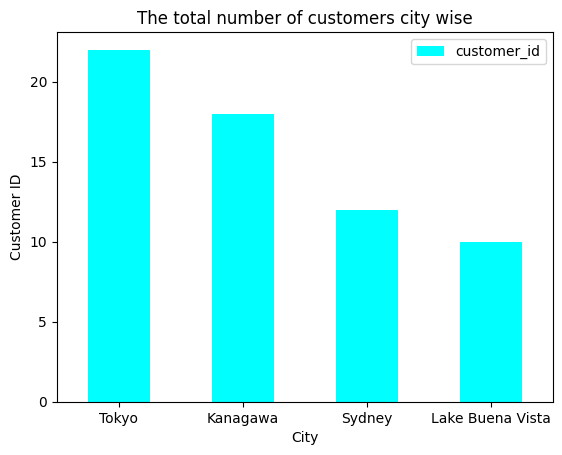

In [77]:
customer_city_pt_sorted.plot(kind='bar',color='Aqua')
plt.title("The total number of customers city wise")
plt.xlabel("City")
plt.xticks(rotation=0)
plt.ylabel("Customer ID")
plt.show()

**2.Identify the most frequent customers based on their order history.**

In [78]:
order_data.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,delivered


In [79]:
pd.pivot_table(order_data,index=['customer_id'],values=['quantity'],aggfunc=['count'])

,count
,quantity
customer_id,
C1003,2
C1004,1
C1005,3
C1006,2
C1008,2
C1009,3
C1010,3
C1011,2


In [80]:
top_10_customers=pd.pivot_table(order_data,index=['customer_id'],values=['quantity'],aggfunc=['count']).nlargest(10,('count','quantity'))
print(top_10_customers)

               count
            quantity
customer_id         
C1005              3
C1009              3
C1010              3
C1013              3
C1003              2
C1006              2
C1008              2
C1011              2
C1014              2
C1015              2


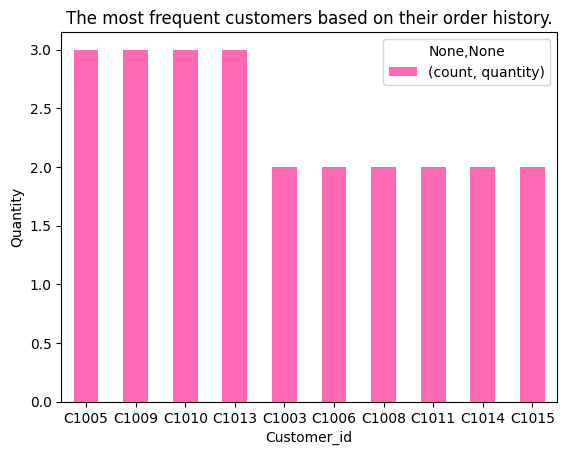

In [81]:
top_10_customers.plot(kind='bar',color='hotpink')
plt.title("The most frequent customers based on their order history.")
plt.xlabel("Customer_id")
plt.xticks(rotation=0)
plt.ylabel("Quantity")
plt.show()

<h3>B.Product Analysis</h3>

**1.Determine the total number of products available by category.**

In [82]:
product_data.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,Furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [83]:
category_wise_product=pd.pivot_table(product_data,index=['category'],values=['product_name'],aggfunc='count')
print(category_wise_product)

             product_name
category                 
Appliance              20
Electronics            32
Furniture               9


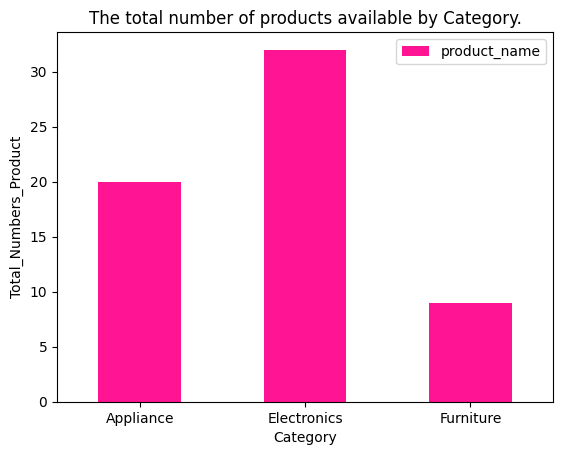

In [84]:
category_wise_product.plot(kind='bar',color='DeepPink')
plt.title("The total number of products available by Category.")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.ylabel("Total_Numbers_Product")
plt.show()

**2.Analyze the distribution of products across sub-categories**

In [85]:
sub_category_wise_product=pd.pivot_table(product_data,index=['sub_category'],values=['product_name'],aggfunc='count')
print(sub_category_wise_product)

               product_name
sub_category               
Accessories               2
Audio                     3
Cameras                   1
Chairs                    2
Computers                 9
Consoles                  1
Desks                     1
Electronics              20
Entertainment             3
Furniture                 1
Lamps                     2
Mobiles                   1
Photography               1
Printers                  1
Sofas                     1
TVs                       1
Tables                    1
Tablets                   2
Wearables                 5
chairs                    1
computer                  1
phone                     1


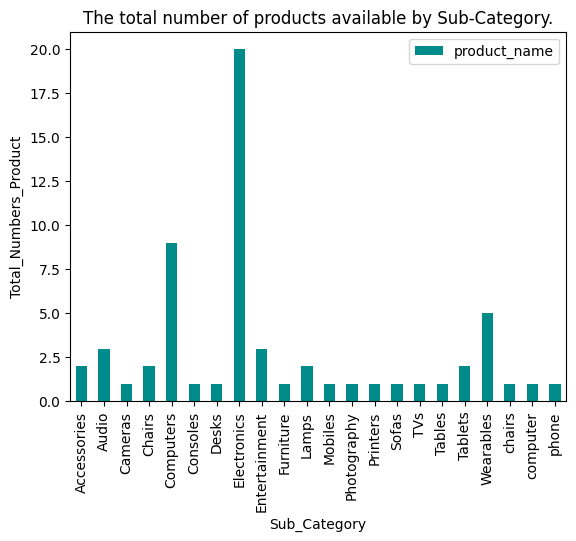

In [86]:
sub_category_wise_product.plot(kind='bar',color='DarkCyan')
plt.title("The total number of products available by Sub-Category.")
plt.xlabel("Sub_Category")
plt.ylabel("Total_Numbers_Product")
plt.show()

**3.Identify products with low stock levels.**

In [87]:
pd.pivot_table(product_data,index=['product_name'],values=['stock'],aggfunc='min')

,stock
product_name,
Air Purifier,15
Blender,10
Bluetooth Speaker,28
Car Vacuum,20
Chair,10
Coffee Maker,20
Desk,15
Desk Lamp,20
Digital Camera,20


In [88]:
low_stock_products=pd.pivot_table(product_data,index=['product_name'],values=['stock'],aggfunc='min').nsmallest(9,'stock')
print(low_stock_products)

                     stock
product_name              
Blender                 10
Chair                   10
Printer                 10
Sofa Set                10
Tablet                  10
chair                   10
Dishwasher              12
External Hard Drive     12
Refrigerator            12


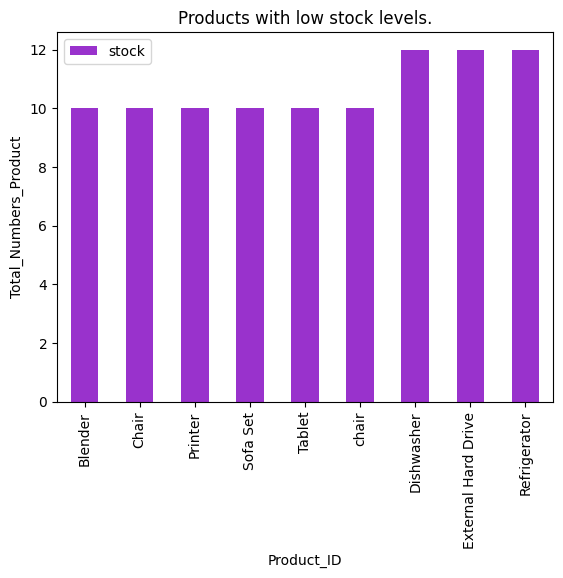

In [89]:
low_stock_products.plot(kind='bar',color='DarkOrchid')
plt.title("Products with low stock levels.")
plt.xlabel("Product_ID")
plt.ylabel("Total_Numbers_Product")
plt.show()

**4.Calculate the average, maximum, and minimum prices for products.**

In [90]:
avarage_price=product_data['selling_price'].mean()
maximum_price=product_data['selling_price'].max()
minimum_price=product_data['selling_price'].min()
print(avarage_price)
print(maximum_price)
print(minimum_price)

17774.62262295082
70000.0
450.0


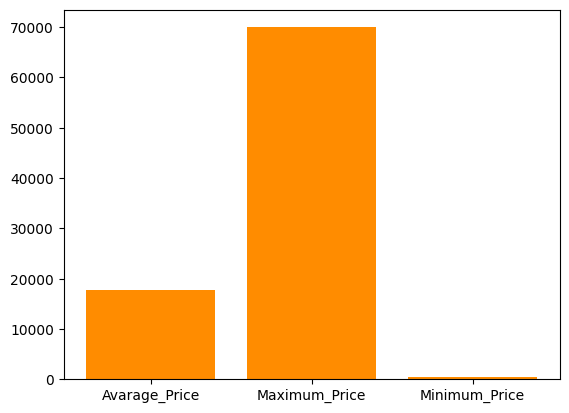

In [91]:
price_category=(["Avarage_Price","Maximum_Price","Minimum_Price"])
price=([avarage_price,maximum_price,minimum_price])
plt.bar(price_category,price,color='DarkOrange')
plt.show()

<h3>C.Order Analysis:</h3>

**1.Calculate the top 10 orders product wise.**

In [92]:
coustmer_order_df.head()

,customer_id,customer_name,city,email,phone_no,address,pin_code,order_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,original_price,selling_price
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99,51.144737,P000,1.355263,20873.684211,COD,2023-12-19,Pending,Unknown Product,Unknown,Not Mention,20019.736842,16973.684211
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001,51.144737,P000,1.355263,20873.684211,COD,2023-12-19,Pending,Unknown Product,Unknown,Not Mention,20019.736842,16973.684211
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,10.000000,P105,1.000000,450.000000,COD,2023-12-19,Pending,Blender,Appliance,Electronics,500.000000,450.000000
3,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,11.000000,P103,1.000000,55000.000000,COD,2023-12-21,Pending,Laptop,Electronics,computer,60000.000000,55000.000000
4,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429,3.000000,P112,1.000000,1000.000000,COD,2023-11-30,Pending,chair,Furniture,chairs,1000.000000,800.000000


In [93]:
top_orders=coustmer_order_df.groupby('product_name')['order_id'].count().nlargest(10)
print(top_orders)

product_name
Tablet             5
Vacuum Cleaner     4
Air Purifier       3
Chair              3
Coffee Maker       3
Digital Camera     3
Smartwatch         3
Television         3
Unknown Product    3
Blender            2
Name: order_id, dtype: int64


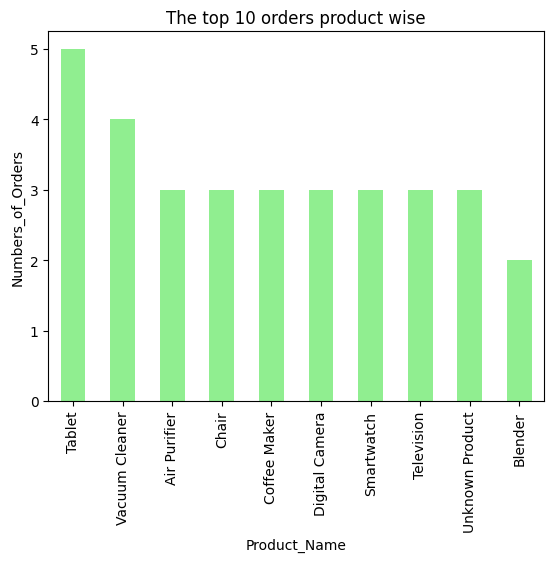

In [94]:
top_orders.plot(kind='bar',color='LightGreen')
plt.title("The top 10 orders product wise")
plt.xlabel("Product_Name")
plt.ylabel("Numbers_of_Orders")
plt.show()

**2.Analyze the order status distribution (e.g., pending, delivered).**

In [95]:
order_data.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,delivered


In [96]:
pd.pivot_table(order_data,index=['order_status'],values=['order_id'],aggfunc='count')

,order_id
order_status,
Cancelled,6
Delivered,27
Pending,25
Returned,1
Shipped,16
delivered,1


In [97]:
order_data['order_status'] = order_data['order_status'].replace('delivered','Delivered')

In [98]:
order_status_distribution=pd.pivot_table(order_data,index=['order_status'],values=['order_id'],aggfunc='count')
print(order_status_distribution)

              order_id
order_status          
Cancelled            6
Delivered           28
Pending             25
Returned             1
Shipped             16


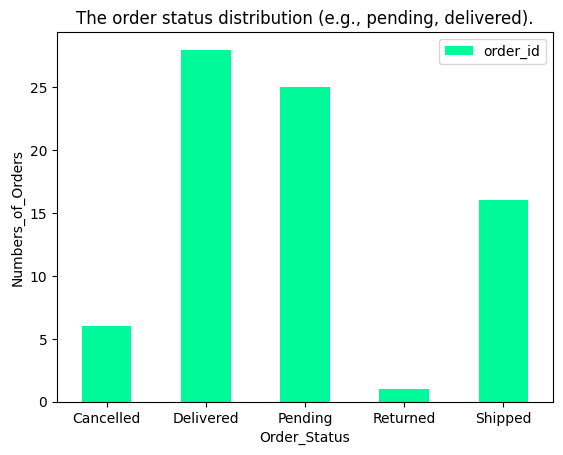

In [99]:
order_status_distribution.plot(kind='bar',color='MediumSpringGreen')
plt.title("The order status distribution (e.g., pending, delivered).")
plt.xlabel("Order_Status")
plt.xticks(rotation=0)
plt.ylabel("Numbers_of_Orders")
plt.show()

**3.Identify the most popular products based on order quantity.**

In [100]:
popular_product_quantity=coustmer_order_df.groupby('product_name')['quantity'].count().nlargest(10)
print(popular_product_quantity)

product_name
Tablet             5
Vacuum Cleaner     4
Air Purifier       3
Chair              3
Coffee Maker       3
Digital Camera     3
Smartwatch         3
Television         3
Unknown Product    3
Blender            2
Name: quantity, dtype: int64


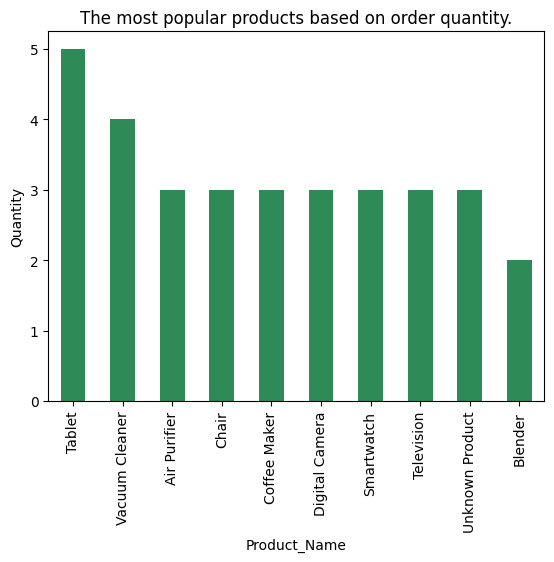

In [101]:
popular_product_quantity.plot(kind='bar',color='SeaGreen')
plt.title("The most popular products based on order quantity.")
plt.xlabel("Product_Name")
plt.ylabel("Quantity")
plt.show()

<h3>D.Sales Analysis:.</h3>

In [102]:
coustmer_order_df.head()

,customer_id,customer_name,city,email,phone_no,address,pin_code,order_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,original_price,selling_price
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99,51.144737,P000,1.355263,20873.684211,COD,2023-12-19,Pending,Unknown Product,Unknown,Not Mention,20019.736842,16973.684211
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001,51.144737,P000,1.355263,20873.684211,COD,2023-12-19,Pending,Unknown Product,Unknown,Not Mention,20019.736842,16973.684211
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,10.000000,P105,1.000000,450.000000,COD,2023-12-19,Pending,Blender,Appliance,Electronics,500.000000,450.000000
3,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,11.000000,P103,1.000000,55000.000000,COD,2023-12-21,Pending,Laptop,Electronics,computer,60000.000000,55000.000000
4,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429,3.000000,P112,1.000000,1000.000000,COD,2023-11-30,Pending,chair,Furniture,chairs,1000.000000,800.000000


**1.Calculate total revenue generated from orders product wise.**

In [103]:
coustmer_order_df['Total_Revenue_OP']=coustmer_order_df['total_price']*coustmer_order_df['quantity']
print(coustmer_order_df['Total_Revenue_OP'].head(10))

0    28289.33518
1    28289.33518
2      450.00000
3    55000.00000
4     1000.00000
5    20000.00000
6    20000.00000
7      450.00000
8    55000.00000
9    15000.00000
Name: Total_Revenue_OP, dtype: float64


product_name
Tablet             297000.00000
Television         208000.00000
Sofa Set           180000.00000
Desk               148000.00000
Smartwatch         140000.00000
Vacuum Cleaner     139000.00000
Laptop             110000.00000
Air Purifier       100000.00000
Unknown Product     84868.00554
Microwave           78000.00000
Name: Total_Revenue_OP, dtype: float64


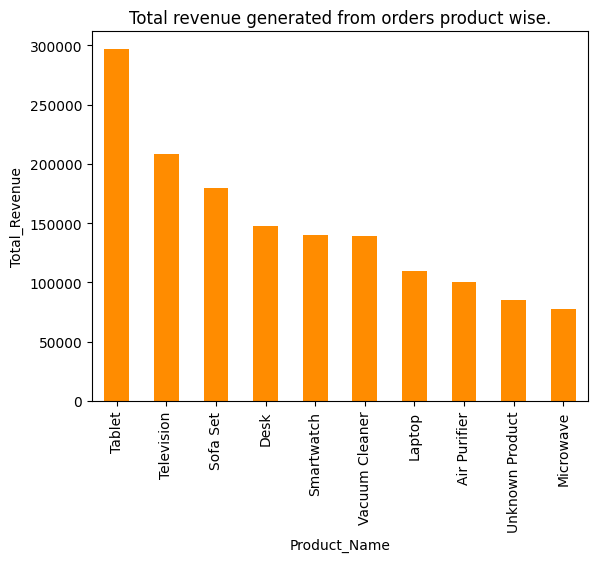

In [104]:
Total_revenue_product_wise=coustmer_order_df.groupby('product_name')['Total_Revenue_OP'].sum().nlargest(10)
print(Total_revenue_product_wise)
Total_revenue_product_wise.plot(kind='bar',color='DarkOrange')
plt.title("Total revenue generated from orders product wise.")
plt.xlabel("Product_Name")
plt.ylabel("Total_Revenue")
plt.show()

**2.Calculate the total revenue generated from all orders**

Total revenue all orders product wise : 2369268.005540166


<function matplotlib.pyplot.show(close=None, block=None)>

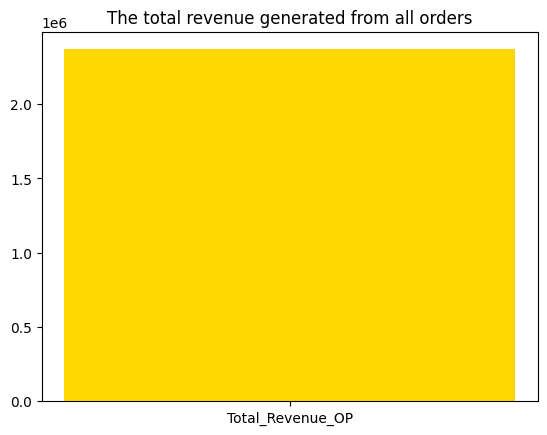

In [105]:
Total_revenue_all_product_wise=coustmer_order_df['Total_Revenue_OP'].sum()
print("Total revenue all orders product wise :",Total_revenue_all_product_wise)
plt.bar(['Total_Revenue_OP'], [Total_revenue_all_product_wise], color='gold')
plt.title('The total revenue generated from all orders')
plt.show

**3.Calculate total revenue product category wise percentage.**

In [106]:
category_quantity=pd.pivot_table(coustmer_order_df,index=['category'],values=['quantity'],aggfunc='count')
print(category_quantity)

             quantity
category             
Appliance          27
Electronics        34
Furniture          15
Unknown             3


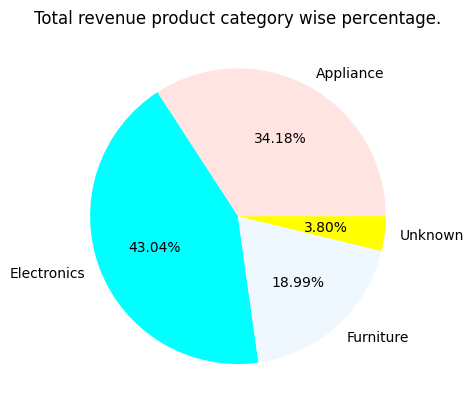

In [107]:
values=category_quantity.values.flatten()
plt.title("Total revenue product category wise percentage.")
plt.pie(values, autopct='%1.2f%%',colors=["MistyRose","Aqua","AliceBlue","yellow"],labels=['Appliance','Electronics','Furniture','Unknown'])
plt.show()

**4.Analyze the performance of different product categories in terms of sales.**

             quantity
category             
Appliance          27
Electronics        34
Furniture          15
Unknown             3


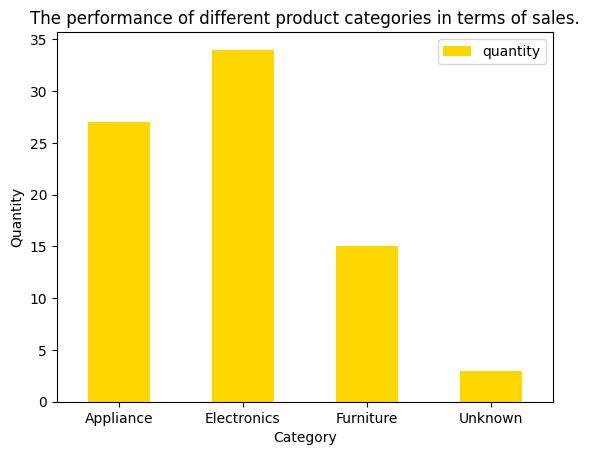

In [187]:
category_quantity=pd.pivot_table(coustmer_order_df,index=['category'],values=['quantity'],aggfunc='count')
print(category_quantity)
category_quantity.plot(kind='bar',xlabel='Category',ylabel='Quantity',color='gold')
plt.title('The performance of different product categories in terms of sales.')
plt.xticks(rotation=0)
plt.show()

**5.Identify the most profitable products based on the difference between
original and selling prices.**

In [108]:
product_data.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,Furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [109]:
product_data['Diff_Original_Selling']=product_data['selling_price']-product_data['original_price']
print(product_data['Diff_Original_Selling'].head())

0    -5000.00
1    -5000.00
2    -5000.00
3      -50.00
4   -12199.01
Name: Diff_Original_Selling, dtype: float64


product_name
Blender                 -50.0
chair                  -200.0
Desk Lamp              -500.0
Gaming Mouse           -500.0
Portable Speaker       -500.0
Smart Scale            -500.0
Wireless Mouse         -500.0
Car Vacuum            -1000.0
Coffee Maker          -1000.0
Electric Toothbrush   -1000.0
Name: Diff_Original_Selling, dtype: float64


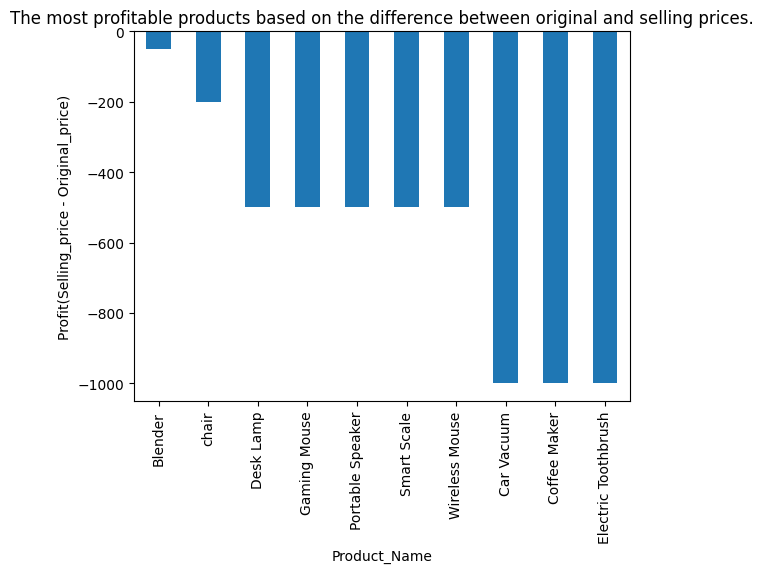

In [110]:
profitable_products=product_data.groupby('product_name')['Diff_Original_Selling'].max().nlargest(10)
print(profitable_products)
profitable_products.plot(kind='bar')
plt.title("The most profitable products based on the difference between original and selling prices.")
plt.xlabel("Product_Name")
plt.ylabel("Profit(Selling_price - Original_price)")
plt.show()

<h3>Customer Order Pattern:</h3>

**1.Identify product names with the highest and lowest order quantities.**

In [111]:
coustmer_order_df.head()

,customer_id,customer_name,city,email,phone_no,address,pin_code,order_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,original_price,selling_price,Total_Revenue_OP
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99,51.144737,P000,1.355263,20873.684211,COD,2023-12-19,Pending,Unknown Product,Unknown,Not Mention,20019.736842,16973.684211,28289.33518
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001,51.144737,P000,1.355263,20873.684211,COD,2023-12-19,Pending,Unknown Product,Unknown,Not Mention,20019.736842,16973.684211,28289.33518
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,10.000000,P105,1.000000,450.000000,COD,2023-12-19,Pending,Blender,Appliance,Electronics,500.000000,450.000000,450.00000
3,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,11.000000,P103,1.000000,55000.000000,COD,2023-12-21,Pending,Laptop,Electronics,computer,60000.000000,55000.000000,55000.00000
4,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429,3.000000,P112,1.000000,1000.000000,COD,2023-11-30,Pending,chair,Furniture,chairs,1000.000000,800.000000,1000.00000


In [112]:
product_order=pd.pivot_table(coustmer_order_df,index=['product_name'],values=['quantity'],aggfunc='sum')
print(product_order)

                     quantity
product_name                 
Air Purifier         4.000000
Blender              2.000000
Bluetooth Speaker    3.000000
Car Vacuum           2.000000
Chair                3.000000
Coffee Maker         4.000000
Desk                 4.000000
Desk Lamp            4.000000
Digital Camera       3.000000
Dining Table         2.000000
Dishwasher           1.000000
Electric Toothbrush  1.000000
External Hard Drive  2.000000
Fitness Tracker      4.000000
Gaming Console       2.000000
Gaming Mouse         1.000000
Headphones           3.000000
Laptop               2.000000
Microwave            4.000000
Microwave Oven       2.000000
Monitor              1.000000
Portable Charger     1.000000
Portable Speaker     1.000000
Printer              3.000000
Projector            1.000000
Recliner             1.000000
Refrigerator         3.000000
Smart Scale          1.000000
Smart Speaker        1.000000
Smartwatch           5.000000
Sofa                 3.000000
Sofa Set  

**2.Identify customers with the highest and lowest order quantities by customer name.**

In [113]:
coustmer_order_df.head()

,customer_id,customer_name,city,email,phone_no,address,pin_code,order_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,original_price,selling_price,Total_Revenue_OP
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99,51.144737,P000,1.355263,20873.684211,COD,2023-12-19,Pending,Unknown Product,Unknown,Not Mention,20019.736842,16973.684211,28289.33518
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001,51.144737,P000,1.355263,20873.684211,COD,2023-12-19,Pending,Unknown Product,Unknown,Not Mention,20019.736842,16973.684211,28289.33518
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,10.000000,P105,1.000000,450.000000,COD,2023-12-19,Pending,Blender,Appliance,Electronics,500.000000,450.000000,450.00000
3,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,11.000000,P103,1.000000,55000.000000,COD,2023-12-21,Pending,Laptop,Electronics,computer,60000.000000,55000.000000,55000.00000
4,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429,3.000000,P112,1.000000,1000.000000,COD,2023-11-30,Pending,chair,Furniture,chairs,1000.000000,800.000000,1000.00000


In [114]:
customer_order_quantity=coustmer_order_df['customer_name'].value_counts()
print(customer_order_quantity)

customer_name
Mia          5
Ava          5
Oliver       5
Ethan        4
Sophia       4
Emma         4
William      3
Evelyn       3
Alexander    3
Harper       3
Henry        3
Jack         3
Wyatt        2
Peter        2
James        2
Olivia       2
Lucas        2
Liam         2
Aria         2
Aiden        1
Elijah       1
Noah         1
Luna         1
Logan        1
Sofia        1
Carter       1
Elena        1
Steve        1
Avery        1
Chloe        1
Scarlett     1
Benjamin     1
Michael      1
john         1
Lucy         1
Leo          1
lilly        1
Jackson      1
Isabella     1
Name: count, dtype: int64


In [115]:
highest_customer = customer_order_quantity.idxmax()
print("Highest_order_quantity_customer name :",highest_customer)
lowest_customer = customer_order_quantity.idxmin()
print("Lowest_order_quantity_customer name :",lowest_customer)


Highest_order_quantity_customer name : Mia
Lowest_order_quantity_customer name : Aiden


In [116]:
pd.pivot_table(coustmer_order_df,index=['quantity'],values=['customer_name'],aggfunc=['max'])

,max
,customer_name
quantity,
1.000000,Wyatt
1.355263,lilly
2.000000,Sophia
3.000000,Oliver


In [117]:
#pd.pivot_table(coustmer_order_df,index=['customer_name'],values=['quantity'],aggfunc='max')
# Assuming 'quantity' is the column you are interested in
high_low_pivot_table = pd.pivot_table(coustmer_order_df,index=['quantity'],values=['customer_name'],aggfunc=['max', 'min'])
print(high_low_pivot_table)
# Extract columns for the highest and lowest quantity
result_df = high_low_pivot_table['customer_name'][['max', 'min']]
print(result_df)

                   max           min
         customer_name customer_name
quantity                            
1.000000         Wyatt         Aiden
1.355263         lilly         Steve
2.000000        Sophia     Alexander
3.000000        Oliver           Ava


KeyError: 'customer_name'

**3.Determine the most preferred payment modes.**

payment_mode
Online    44
COD       35
Name: count, dtype: int64


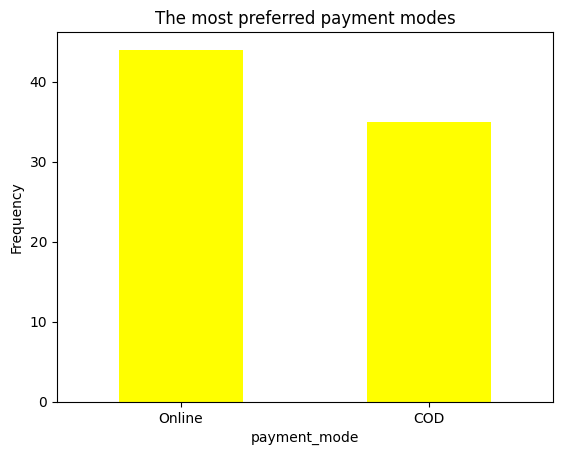

In [118]:
preferred_pay_mode=coustmer_order_df['payment_mode'].value_counts()
print(preferred_pay_mode)
preferred_pay_mode.plot(kind='bar',color='yellow')
plt.title('The most preferred payment modes')
plt.xlabel('payment_mode')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

<h3>Time Based Analysis</h3>

**1.Month Wise Total Sales.**

In [163]:
coustmer_order_df['order_month']=pd.to_datetime(coustmer_order_df['order_date'])
coustmer_order_df['order_month']=coustmer_order_df['order_month'].dt.strftime('%B')
print(coustmer_order_df['order_month'])

0     December
1     December
2     December
3     December
4     November
        ...   
74       March
75       March
76       March
77       March
78       March
Name: order_month, Length: 79, dtype: object


               total_price
order_month               
December     492071.052632
February     446000.000000
January      503000.000000
March        186500.000000
November      21450.000000


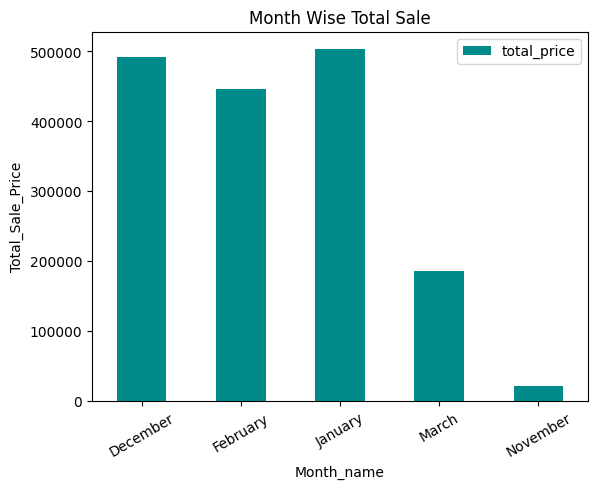

In [166]:
month_wise_sale=pd.pivot_table(coustmer_order_df,index=['order_month'],values=['total_price'],aggfunc='sum')
print(month_wise_sale)
month_wise_sale.plot(kind='bar',color='DarkCyan')
plt.title('Month Wise Total Sale')
plt.xlabel('Month_name')
plt.xticks(rotation=30)
plt.ylabel('Total_Sale_Price')
plt.show()

**2.Month and Year Wise Total Sale**

In [167]:
coustmer_order_df['month_year']=pd.to_datetime(coustmer_order_df['order_date'])
coustmer_order_df['month_year']=coustmer_order_df['month_year'].dt.strftime('%Y-%B')
print(coustmer_order_df['month_year'])

0     2023-December
1     2023-December
2     2023-December
3     2023-December
4     2023-November
          ...      
74       2024-March
75       2024-March
76       2024-March
77       2024-March
78       2024-March
Name: month_year, Length: 79, dtype: object


                 total_price
month_year                  
2023-December  492071.052632
2023-November   21450.000000
2024-February  446000.000000
2024-January   503000.000000
2024-March     186500.000000


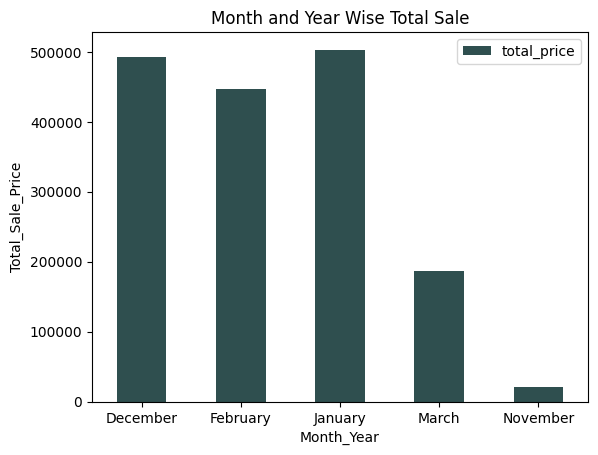

In [173]:
month_year_wise_sale=pd.pivot_table(coustmer_order_df,index=['month_year'],values=['total_price'],aggfunc='sum')
print(month_year_wise_sale)
month_wise_sale.plot(kind='bar',color='DarkSlateGrey')
plt.title('Month and Year Wise Total Sale')
plt.xlabel('Month_Year')
plt.xticks(rotation=0)
plt.ylabel('Total_Sale_Price')
plt.show()

**3.Identify peak order date.**

order_date
2023-11-23    1
2023-11-30    2
2023-12-01    1
2023-12-08    1
2023-12-15    1
             ..
2024-03-17    1
2024-03-18    1
2024-03-19    1
2024-03-20    1
2024-03-21    1
Name: count, Length: 75, dtype: int64


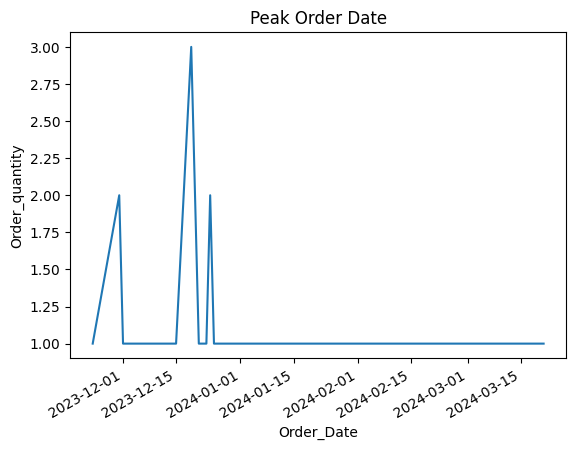

In [183]:
date_wise_order=coustmer_order_df['order_date'].value_counts().sort_index()
print(date_wise_order)
date_wise_order.plot(kind='line',xlabel='Order_Date',ylabel='Order_quantity')
plt.title('Peak Order Date')
plt.show()

<h3>Geographical Analysis</h3>

**1.Explore the distribution of customers across different cities.**

city
Kanagawa            25
Tokyo               24
Sydney              15
Lake Buena Vista    15
Name: count, dtype: int64


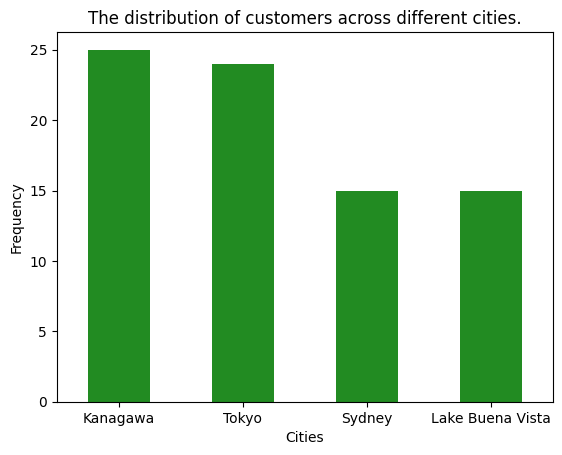

In [119]:
customer_city=coustmer_order_df['city'].value_counts()
print(customer_city)
customer_city.plot(kind='bar',color='ForestGreen')
plt.title('The distribution of customers across different cities.')
plt.xlabel('Cities')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

**2.Analyze whether certain products or categories are more popular in a 
specific city.**

In [120]:
category_basedon_city=pd.pivot_table(coustmer_order_df,index=['city','category'],values=['quantity'],aggfunc='count')
print(category_basedon_city)

                              quantity
city             category             
Kanagawa         Appliance           8
                 Electronics        11
                 Furniture           6
Lake Buena Vista Appliance           4
                 Electronics         7
                 Furniture           4
Sydney           Appliance           5
                 Electronics         7
                 Furniture           2
                 Unknown             1
Tokyo            Appliance          10
                 Electronics         9
                 Furniture           3
                 Unknown             2


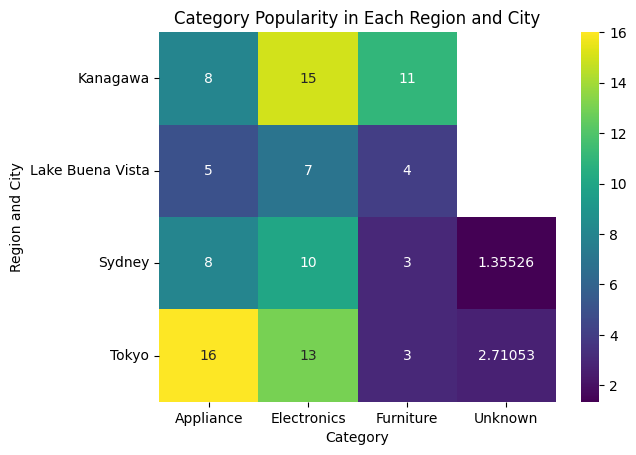

In [121]:
# analyzing whether certain products or categories are more popular in a specific city 
city_product_popularity = coustmer_order_df.groupby(['city', 'category'])['quantity'].sum().unstack()
sns.heatmap(city_product_popularity, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': ''})
plt.title('Category Popularity in Each Region and City')
plt.xlabel('Category')
plt.ylabel('Region and City')
plt.yticks(rotation=0)
plt.show()

<h3>Product Performance</h3>

In [122]:
order_data['quantity'].value_counts()

quantity
1.0    52
2.0    21
3.0     3
Name: count, dtype: int64

In [123]:
coustmer_order_df.head()

,customer_id,customer_name,city,email,phone_no,address,pin_code,order_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,original_price,selling_price,Total_Revenue_OP
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99,51.144737,P000,1.355263,20873.684211,COD,2023-12-19,Pending,Unknown Product,Unknown,Not Mention,20019.736842,16973.684211,28289.33518
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001,51.144737,P000,1.355263,20873.684211,COD,2023-12-19,Pending,Unknown Product,Unknown,Not Mention,20019.736842,16973.684211,28289.33518
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,10.000000,P105,1.000000,450.000000,COD,2023-12-19,Pending,Blender,Appliance,Electronics,500.000000,450.000000,450.00000
3,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,11.000000,P103,1.000000,55000.000000,COD,2023-12-21,Pending,Laptop,Electronics,computer,60000.000000,55000.000000,55000.00000
4,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429,3.000000,P112,1.000000,1000.000000,COD,2023-11-30,Pending,chair,Furniture,chairs,1000.000000,800.000000,1000.00000


**1.Identify the top 10 best-selling products.**

In [124]:
coustmer_order_df['quantity'].value_counts()

quantity
1.000000    52
2.000000    21
1.355263     3
3.000000     3
Name: count, dtype: int64

                   quantity
product_name               
Desk Lamp               3.0
Microwave               3.0
Smartwatch              3.0
Air Purifier            2.0
Bluetooth Speaker       2.0
Car Vacuum              2.0
Coffee Maker            2.0
Desk                    2.0
Fitness Tracker         2.0
Headphones              2.0


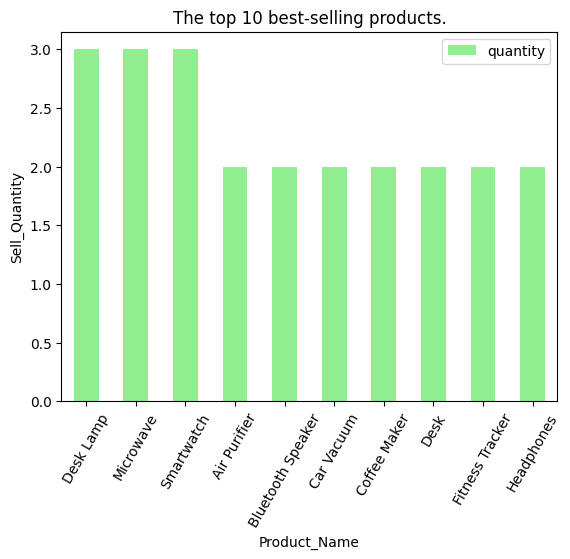

In [125]:
Top_ten_selling=pd.pivot_table(coustmer_order_df,index=['product_name'],values=['quantity'],aggfunc='max').nlargest(10,('quantity'))
print(Top_ten_selling)
Top_ten_selling.plot(kind='bar',color='lightgreen')
plt.title('The top 10 best-selling products.')
plt.xlabel('Product_Name')
plt.xticks(rotation=60)
plt.ylabel('Sell_Quantity')
plt.show()

**2.Identify top 10 slow-moving products based on low sales.**

                     quantity
product_name                 
Air Purifier              1.0
Blender                   1.0
Bluetooth Speaker         1.0
Chair                     1.0
Coffee Maker              1.0
Desk Lamp                 1.0
Digital Camera            1.0
Dining Table              1.0
Dishwasher                1.0
Electric Toothbrush       1.0


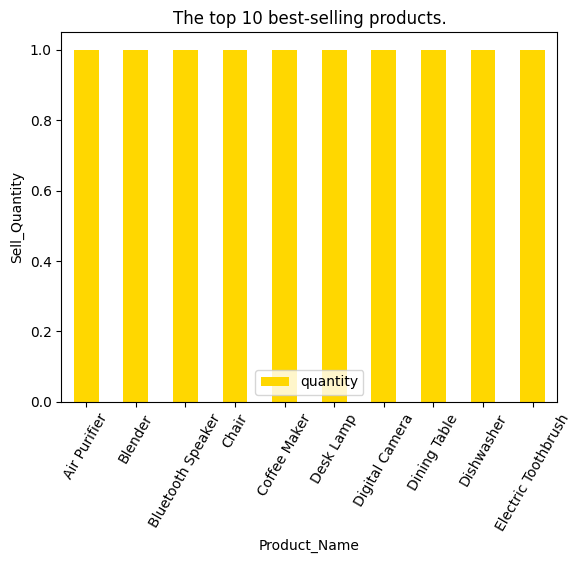

In [126]:
bottom_ten_selling=pd.pivot_table(coustmer_order_df,index=['product_name'],values=['quantity'],aggfunc='min').nsmallest(10,('quantity'))
print(bottom_ten_selling)
bottom_ten_selling.plot(kind='bar',color='gold')
plt.title('The top 10 best-selling products.')
plt.xlabel('Product_Name')
plt.xticks(rotation=60)
plt.ylabel('Sell_Quantity')
plt.show()

<h3>Customer Retention:</h3>

**1.Analyze repeat customers and their order patterns.**

In [127]:
repeat_customer=coustmer_order_df['customer_name'].value_counts().gt(1).value_counts()
print(repeat_customer)

count
False    20
True     19
Name: count, dtype: int64


In [128]:
coustmer_order_df['customer_name'].value_counts()

customer_name
Mia          5
Ava          5
Oliver       5
Ethan        4
Sophia       4
Emma         4
William      3
Evelyn       3
Alexander    3
Harper       3
Henry        3
Jack         3
Wyatt        2
Peter        2
James        2
Olivia       2
Lucas        2
Liam         2
Aria         2
Aiden        1
Elijah       1
Noah         1
Luna         1
Logan        1
Sofia        1
Carter       1
Elena        1
Steve        1
Avery        1
Chloe        1
Scarlett     1
Benjamin     1
Michael      1
john         1
Lucy         1
Leo          1
lilly        1
Jackson      1
Isabella     1
Name: count, dtype: int64

               quantity
customer_name          
Alexander             3
Aria                  2
Ava                   5
Emma                  4
Ethan                 4
Evelyn                3
Harper                3
Henry                 3
Jack                  3
James                 2
Liam                  2
Lucas                 2
Mia                   5
Oliver                5
Olivia                2
Peter                 2
Sophia                4
William               3
Wyatt                 2


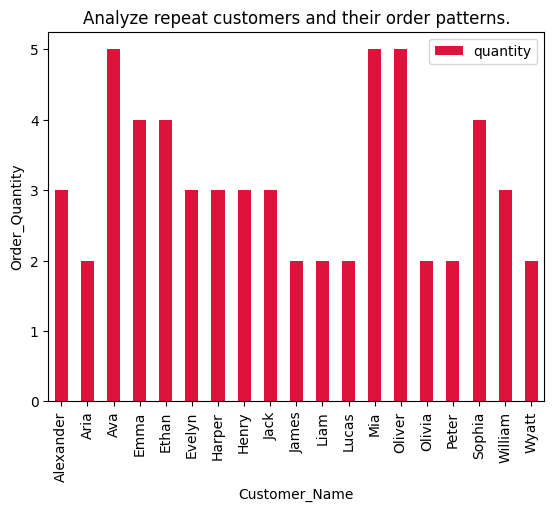

In [129]:
# Assuming 'quantity' is the column you are interested in
repeat_customer_pivot_table= pd.pivot_table(coustmer_order_df, index='customer_name', values='quantity', aggfunc='count')
# Filter rows where the count is greater than 1
filtered_repeat_customer_pivot_table = repeat_customer_pivot_table[repeat_customer_pivot_table['quantity'] > 1]
print(filtered_repeat_customer_pivot_table)
filtered_repeat_customer_pivot_table.plot(kind='bar',color='Crimson')
plt.xlabel('Customer_Name')
plt.ylabel('Order_Quantity')
plt.title('Analyze repeat customers and their order patterns.')
plt.show()

**2.Calculate customer retention rates over time.**

<h3>Payment Analysis</h3>

**1.Display successful and pending payments order counts.**

In [130]:
order_data.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,Delivered


order_status
Delivered    28
Pending      25
Shipped      16
Cancelled     6
Returned      1
Name: count, dtype: int64


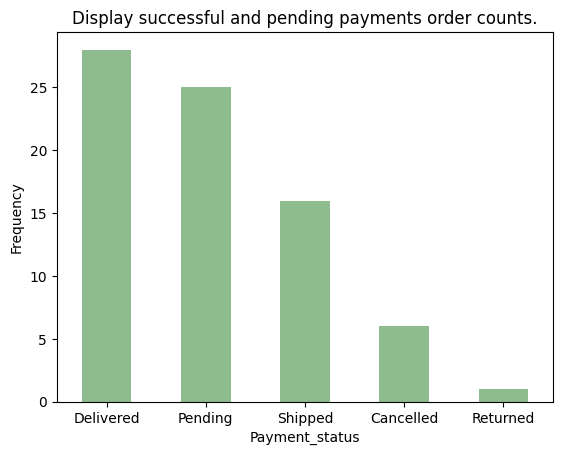

In [131]:
payment_order_status=order_data['order_status'].value_counts()
print(payment_order_status)
payment_order_status.plot(kind='bar',color='DarkSeaGreen')
plt.title('Display successful and pending payments order counts.')
plt.xlabel('Payment_status')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()